# Unit step response

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from plotting_functions import *
from estimation import *

In [2]:
def find_unitstep_response(model, parameter_table):
    taulist = np.array(parameter_table.loc[model,'tau1':'tau4'])
    a_n = np.array(parameter_table.loc[model,'a_1':'a_4'])
    F2x = parameter_table.loc[model,'F2x']
    dim = len(taulist)
    if any(a_n == 0):
        dim = np.count_nonzero(a_n[:dim])
        zeroindex = np.where(a_n == 0)[0]
        a_n = np.delete(a_n,zeroindex)
        taulist = np.delete(taulist,zeroindex)
    a_n_unitforcing = a_n[:dim]/(2*F2x)
    T_comp =  a_n_unitforcing*tas_predictors(t, fixed_par = taulist, exptype = 'stepforcing')
    T = np.sum(T_comp,axis=1)
    return T

In [12]:
np.full

<function numpy.full(shape, fill_value, dtype=None, order='C')>

In [13]:
np.full((len(models), 150), np.nan)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

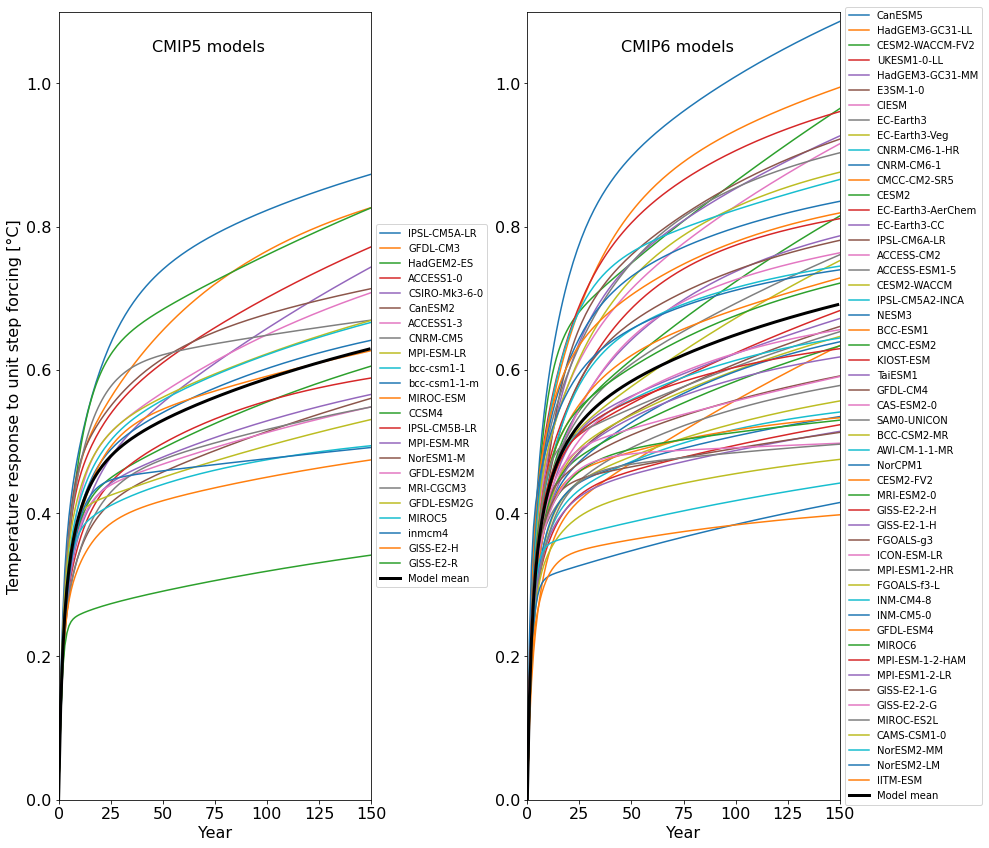

In [24]:

t = np.arange(0,151)
fig, ax = plt.subplots(ncols = 2, figsize = (14,14.5))
plt.subplots_adjust(wspace = 0.5)
#plt.suptitle('Unit step responses, where legend is sorted by value in year 150', fontsize = 16, y = 0.92)

####### CMIP5 models #######:
filename = 'best_estimated_parameters_cmip5.txt'
parameter_table = pd.read_csv('../Estimates/CMIP5_forcing_estimates/' + filename, index_col=0, sep = '\t')
models = parameter_table.index
T_cmip5 = np.full((len(models), 150), np.nan)
T_endvalues_cmip5 = {}
for (mi, model) in enumerate(models):
    T = find_unitstep_response(model, parameter_table)
    T_cmip5[mi, :] = T[:150]
    T_endvalues_cmip5[model] = T[-1]

# dictionary sorted by end values: 
T_endvalues_cmip5_sorted = dict(reversed(sorted(T_endvalues_cmip5.items(), key=lambda item: item[1])))
# plot in this order
for model in T_endvalues_cmip5_sorted.keys():
    T = find_unitstep_response(model, parameter_table)
    ax[0].plot(T, label = model)
    
# plot mean values:
meanT_cmip5 = T_cmip5.mean(axis=0)
ax[0].plot(meanT_cmip5, color = 'black', linewidth = 3, label = 'Model mean')

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[0].text(0.3,0.95, 'CMIP5 models',transform=ax[0].transAxes, fontsize=16)
ax[0].set_ylabel('Temperature response to unit step forcing [°C]',fontsize=16)

####### CMIP6 models #######:
filename = 'best_estimated_parameters_allmembers.csv'
parameter_table = pd.read_csv('../Estimates/' + filename, index_col=0)
models = list(parameter_table.index)
models.remove('CNRM-ESM2-1')
T_cmip6 = np.full((len(models), 150), np.nan)
T_endvalues_cmip6 = {}
for (mi, model) in enumerate(models):
    T = find_unitstep_response(model, parameter_table)
    T_cmip6[mi, :] = T[:150]
    T_endvalues_cmip6[model] = T[-1]
    
T_endvalues_cmip6_sorted = dict(reversed(sorted(T_endvalues_cmip6.items(), key=lambda item: item[1])))    
for model in T_endvalues_cmip6_sorted.keys():
    T = find_unitstep_response(model, parameter_table)    
    ax[1].plot(T, label = model)
# plot mean values:
meanT_cmip6 = T_cmip6.mean(axis=0)
ax[1].plot(meanT_cmip6, color = 'black', linewidth = 3, label = 'Model mean')

ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[1].text(0.3,0.95, 'CMIP6 models',transform=ax[1].transAxes, fontsize=16)
# CNRM-ESM2-1 has a strong response per unit forcing, to compensate for the low forcing estimate

for axis in ax:
    axis.set_ylim(0,1.1)
    axis.set_xlim(0,150)
    axis.tick_params(axis='both',labelsize=16)
    axis.set_xlabel('Year',fontsize=16)
    
#plt.savefig('../Figures/Unit_step_responses.pdf', format='pdf', dpi=600, bbox_inches="tight")
        

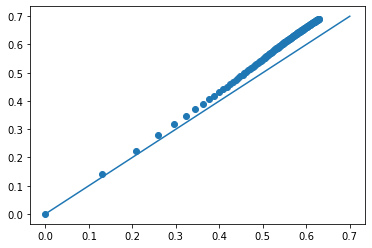

In [21]:
plt.scatter(meanT_cmip5, meanT_cmip6)
plt.plot([0,0.7], [0,0.7])

In [4]:
models

Index(['ACCESS-CM2', 'ACCESS-ESM1-5', 'AWI-CM-1-1-MR', 'BCC-CSM2-MR',
       'BCC-ESM1', 'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CESM2-FV2',
       'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CIESM', 'CMCC-CM2-SR5', 'CMCC-ESM2',
       'CNRM-CM6-1', 'CNRM-CM6-1-HR', 'CNRM-ESM2-1', 'CanESM5', 'E3SM-1-0',
       'EC-Earth3', 'EC-Earth3-AerChem', 'EC-Earth3-CC', 'EC-Earth3-Veg',
       'FGOALS-f3-L', 'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'GISS-E2-1-H',
       'GISS-E2-2-G', 'GISS-E2-2-H', 'HadGEM3-GC31-LL', 'HadGEM3-GC31-MM',
       'ICON-ESM-LR', 'IITM-ESM', 'INM-CM4-8', 'INM-CM5-0', 'IPSL-CM5A2-INCA',
       'IPSL-CM6A-LR', 'KIOST-ESM', 'MIROC-ES2L', 'MIROC6', 'MPI-ESM-1-2-HAM',
       'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NESM3', 'NorCPM1',
       'NorESM2-LM', 'NorESM2-MM', 'SAM0-UNICON', 'TaiESM1', 'UKESM1-0-LL',
       'FGOALS-g3'],
      dtype='object')